# Tutorial 1

Crash course in Julia basics:

Arithmetic, arrays, tuples, strings, dictionaries, functions,
iteration, random numbers, package loading, plotting

(40 min)

## Julia is a calculator:

In [1]:
1 + 2^3

9

In [2]:
sqrt(1 + 2^3) # do `sqrt(ans)` in REPL

3.0

In [3]:
sin(pi)

1.2246467991473532e-16

Query a function's document:

In [4]:
@doc sin

```
sin(x)
```

Compute sine of `x`, where `x` is in radians.

See also [`sind`], [`sinpi`], [`sincos`], [`cis`].

```
sin(A::AbstractMatrix)
```

Compute the matrix sine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the sine. Otherwise, the sine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> sin(fill(1.0, (2,2)))
2×2 Matrix{Float64}:
 0.454649  0.454649
 0.454649  0.454649
```


At the REPL, you can instead do `?sin`. And you can search for all
doc-strings referring to "sine" with `apropos("sine")`.

## Arrays

One dimensional vectors:

In [5]:
v = [3, 5, 7]

3-element Vector{Int64}:
 3
 5
 7

In [6]:
length(v)

3

A "row vector" is a 1 x n array:

In [7]:
row = [3 5 7]

1×3 Matrix{Int64}:
 3  5  7

Multiple row vectors separated by semicolons or new lines define matrices:

In [8]:
A = [3 5 7
     2 4 6
     1 3 5]

3×3 Matrix{Int64}:
 3  5  7
 2  4  6
 1  3  5

In [9]:
size(A)

(3, 3)

In [10]:
length(A)

9

Accessing elements (Julia indices start at 1 not 0):

In [11]:
A[1, 2]

5

Get the second column:

In [12]:
A[:, 2] # 2nd column

3-element Vector{Int64}:
 5
 4
 3

Changing elements:

In [13]:
A[1, 1] = 42

42

Matrices can also be indexed as if columns where concatenated into a
single vector (which is how they are stored internally):

In [14]:
A[2, 1] == A[2]

true

In [15]:
inv(A) # inverse

3×3 Matrix{Float64}:
  0.025641   -0.0512821   0.025641
 -0.0512821   2.60256    -3.05128
  0.025641   -1.55128     2.02564

In [16]:
isapprox(inv(A)*v, A\v) # but RHS more efficient

true

## "Variables" in Julia *point* to objects

Corollary: all passing of function arguments is pass by reference.

Like Python; Unlike R, C or FORTRAN.

In [17]:
u = [3, 5, 7]

w = u

3-element Vector{Int64}:
 3
 5
 7

In [18]:
w

3-element Vector{Int64}:
 3
 5
 7

In [19]:
u[1] = 42

42

In [20]:
u

3-element Vector{Int64}:
 42
  5
  7

In [21]:
w

3-element Vector{Int64}:
 42
  5
  7

## Tuples

Similar to vectors but of fixed length and immutable (cannot be changed)

In [22]:
t1 = (1, 2.0, "cat")
typeof(t1)

Tuple{Int64, Float64, String}

In [23]:
t1[3]

"cat"

Tuples also come in a *named* variety:

In [24]:
t2 = (i = 1, x = 2.0, animal="cat")

(i = 1, x = 2.0, animal = "cat")

In [25]:
t2.x

2.0

## Strings and relatives

In [26]:
a_string = "the cat"
a_character = 't'
a_symbol = :t

:t

In [27]:
a_string[1] == a_character

true

A `Symbol` is string-like but
[interned](https://en.wikipedia.org/wiki/String_interning). Generally
use `String` for ordinary textual data, but use `Symbol` for
language reflection (metaprogramming). For example:

In [28]:
isdefined(Main, :z)

false

In [29]:
z = 1 + 2im

1 + 2im

In [30]:
isdefined(Main, :z)

true

In [31]:
z.im

2

In [32]:
fieldnames(typeof(z))

(:re, :im)

Symbols are generalized by *expressions*:

In [33]:
ex = :(z == 3)
eval(ex)

false

If this is confusing, forget it for now.

## Dictionaries

In [34]:
d = Dict('a' => "ant", 'z' => "zebra")

Dict{Char, String} with 2 entries:
  'a' => "ant"
  'z' => "zebra"

In [35]:
d['a']

"ant"

In [36]:
d['b'] = "bat"
d

Dict{Char, String} with 3 entries:
  'a' => "ant"
  'z' => "zebra"
  'b' => "bat"

In [37]:
keys(d)

KeySet for a Dict{Char, String} with 3 entries. Keys:
  'a'
  'z'
  'b'

The expression 'a' => "ant" is itself a stand-alone object:

In [38]:
pair = 'a' => "ant"
first(pair)

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

## Functions

Three ways to define a generic function:

In [39]:
foo(x) = x^2 # METHOD 1 (inline)
foo(3)

9

or

In [40]:
3 |> foo

9

or

In [41]:
3 |> x -> x^2 # METHOD 2 (anonymous)

9

or

In [42]:
function foo2(x) # METHOD 3 (verbose)
    y = x
    z = y
    w = z
    return w^2
end

foo2(3)

9

## Basic iteration

Here are four ways to square the integers from 1 to 10.

METHOD 1 (explicit loop):

In [43]:
squares = [] # or Int[] if performance matters
for x in 1:10
    push!(squares, x^2)
end

squares

10-element Vector{Any}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 2 (comprehension):

In [44]:
[x^2 for x in 1:10]

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 3 (map):

In [45]:
map(x -> x^2, 1:10)

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 4 (broadcasting with dot syntax):

In [46]:
(1:10) .^ 2

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

## Random numbers

In [47]:
typeof(2)

Int64

In [48]:
rand() # sample a Float64 uniformly from interval [0, 1]

0.7117617703216096

In [49]:
rand(3, 4) # do that 12 times and put in a 3 x 4 array

3×4 Matrix{Float64}:
 0.240644  0.970284  0.401149  0.67522
 0.684286  0.563369  0.777721  0.262385
 0.161076  0.321275  0.812235  0.328231

In [50]:
randn(3, 4) # use normal distribution instead

3×4 Matrix{Float64}:
 -0.149288   0.240136  0.97801    0.388299
 -1.28294    0.187784  1.34946   -0.576163
 -0.303097  -1.87085   0.909679   0.852602

In [51]:
rand(Int8) # random elment of type Int8

58

In [52]:
rand(['a', 'b', 'c'], 10) # 10 random elements from a vector

10-element Vector{Char}:
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)

Some standard libraries are needed to do more, for example:

In [53]:
using Random

In [54]:
randstring(30)

"uINdD0sNkHKSKs35Oi7VJE3OrynF3k"

In [55]:
using Statistics

In [56]:
y = rand(30)
mean(y)

0.5661860437076254

In [57]:
quantile(y, 0.75);

(Use the macro @show before stuff you want printed prefixed by
*what* it is that is being printed.)

For sampling from more general distributions we need
Distributions.jl package which is not part of the standard library.

## Loading packages

If not in the REPL:

In [58]:
using Pkg                        # built-in package manager
Pkg.status()                     # list packages in active environment
Pkg.activate("env", shared=true) # create a new pkg env

      Status `~/.julia/environments/work/Project.toml`
  [024491cd] BetaML v0.6.0
  [336ed68f] CSV v0.10.4
  [324d7699] CategoricalArrays v0.10.5
  [34f1f09b] ClusterManagers v0.4.3
  [ed09eef8] ComputationalResources v0.3.2
  [a93c6f00] DataFrames v1.3.4
  [7806a523] DecisionTree v0.10.11
  [b4f34e82] Distances v0.10.7
  [31c24e10] Distributions v0.25.58
  [e30172f5] Documenter v0.27.17
  [35a29f4d] DocumenterTools v0.1.14
  [f6006082] EvoTrees v0.9.6
  [713c75ef] Franklin v0.10.74
  [38e38edf] GLM v1.7.0
  [d6553e53] HelloJulia v0.1.0 `~/HelloJulia`
  [7073ff75] IJulia v1.23.3
  [98b081ad] Literate v2.13.2
  [add582a8] MLJ v0.18.2
  [a7f614a8] MLJBase v0.20.5 `~/MLJ/MLJBase`
  [c6f25543] MLJDecisionTreeInterface v0.2.2
  [50ed68f4] MLJEnsembles v0.3.0
  [094fc8d1] MLJFlux v0.2.7
  [caf8df21] MLJGLMInterface v0.3.0
  [614be32b] MLJIteration v0.5.0
  [6ee0df7b] MLJLinearModels v0.6.2
  [e80e1ace] MLJModelInterface v1.4.2
  [d491faf4] MLJModels v0.15.9 `~/MLJ/MLJModels`
  [1b6a4a23] MLJ

  Activating project at `~/.julia/environments/env`


Add some packages to your environment (latest compatible versions
added by default):

In [59]:
Pkg.add("Distributions")
Pkg.add("CairoMakie")
Pkg.status()

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/env/Project.toml`
  No Changes to `~/.julia/environments/env/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/env/Project.toml`
  No Changes to `~/.julia/environments/env/Manifest.toml`


      Status `~/.julia/environments/env/Project.toml`
  [13f3f980] CairoMakie v0.8.3
  [31c24e10] Distributions v0.25.59
  [d872a56f] ElectronDisplay v1.0.1


To load the code for use:

In [60]:
using Distributions

using CairoMakie
CairoMakie.activate!(type = "svg")

N = 1000
samples = rand(Normal(), N);   # equivalent to Julia's built-in `randn(d)`
samples = (samples).^2;        # square element-wise

┌ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
└ @ Base loading.jl:1423


In [61]:
g = fit(Gamma, samples)

Gamma{Float64}(α=0.4765306799111099, θ=1.945914966015049)

In [62]:
mean(g)

0.9272881818043557

In [63]:
median(g)

0.4037500523808547

In [64]:
pdf(g, 1)

0.2343398841683325

## Plotting

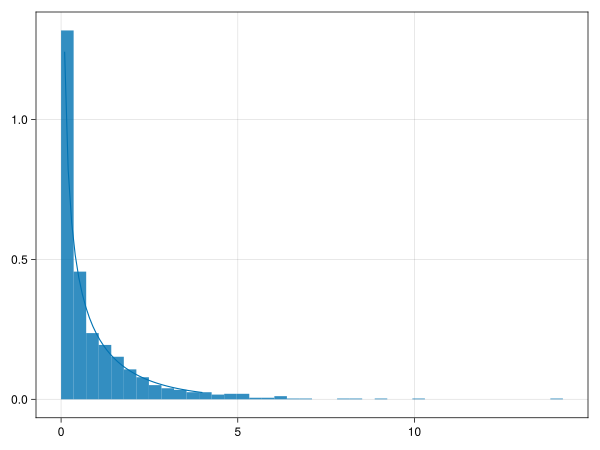

In [65]:
f(x) = pdf(g, x)

xs = 0:0.1:4 # floats from 0 to 4 in steps of 0.1
ys = f.(xs)  # apply f element-wise to xs

fig = lines(xs, ys)
hist!(samples, normalization=:pdf, bins=40, alpha=0.4)
current_figure()

In [66]:
save("my_first_plot.svg", fig)

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x00007fca8efb1c90, 600.0, 450.0, IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1))


# Exercises

## Exercise 1

Write a function named `total` that adds the elements of its vector input.

## Exercise 2

Generate a 1000 random samples from the standard normal
distribution. Create a second such sample, and add the two samples
point-wise.  Compute the (sample) mean and variance of the combined
samples. In the same
plot, show a frequency-normalized histogram of the combined samples
and a plot of the pdf for normal distribution with zero mean and
variance `2`.

You can use `std` to compute the standard deviation and `sqrt` to
compute square roots.

## Exercise 3

The following shows that named tuples share some behaviour with dictionaries:

In [67]:
t = (x = 1, y = "cat", z = 4.5)
keys(t)

(:x, :y, :z)

In [68]:
t[:y]

"cat"

Write a function called `dict` that converts a named tuple to an
actual dictionary. You can create an empty dictionary using `Dict()`.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*